In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('kc_house_data.csv', encoding = 'cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Задача 1
* Постройте график  
* Назовите график  
* Сделайте именование оси x и оси y  
* Сделайте выводы  

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices  
1.2 Изучите стоимости недвижимости  
1.3 Изучите распределение квадратуры жилой площади   
1.4 Изучите распределение года постройки  

### Изучим стоимость недвижимости    
##### Предлагаю рассмотреть:  
* cреднюю стоимость недвижимости в зависимости  от состояния дома  
* зависимость цены от месяца

In [43]:
# Изучите стоимости недвижимости (среднюю стоимость недвижимости в зависимости от состояния дома)
data=df.groupby('condition').agg({'price' : 'mean'}).reset_index().sort_values('condition')
data

,condition,price
0,1,334431.666667
1,2,327287.145349
2,3,542012.578148
3,4,521200.390033
4,5,612418.089359


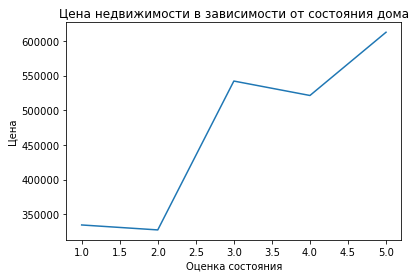

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(data['condition'], data['price']);
plt.title('Цена недвижимости в зависимости от состояния дома')
plt.xlabel('Оценка состояния')
plt.ylabel('Цена');

### Из этого графика видно, что чем выше оценка состояния недвижимости, тем выше стоимость 

In [45]:
# Создадим столбец месяца продажи, чтобы нати зависимость цены от месяца
df['month_sale'] = df['date'].apply(lambda x: x[4:6])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,02
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,02


In [46]:
data_1=df.groupby('month_sale').agg({'price' : 'mean'}).reset_index().sort_values('month_sale')
data_1

,month_sale,price
0,01,525870.889571
1,02,507851.371200
2,03,543977.187200
3,04,561837.774989
4,05,550768.785833
5,06,558002.199541
6,07,544788.764360
7,08,536445.276804
8,09,529253.821871
9,10,539026.971778


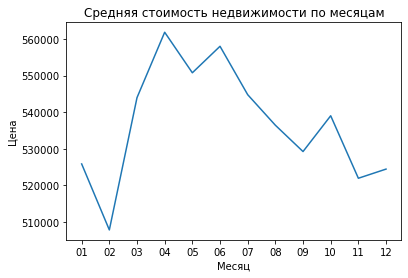

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(data_1['month_sale'], data_1['price']);
plt.title('Средняя стоимость недвижимости по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена');

### Из этого графика стоит отметить, что в начале и конце года, цена на недвижимость ниже, чем цены в середине года

In [48]:
# 1.3 Изучите распределение квадратуры жилой площади
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,02
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,02


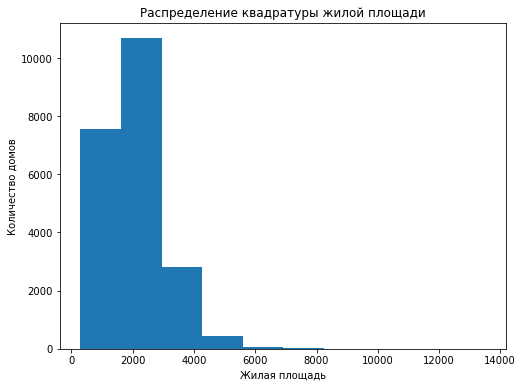

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

### По распределению жилой площади стоит отметить большую часть домов до 3000

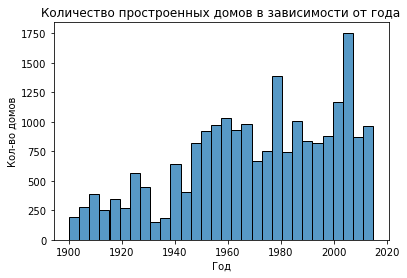

In [50]:
# Изучите распределение года постройки
plt.figure(figsize=(6, 4))

sns.histplot(df['yr_built'], bins=30)

plt.title('Количество простроенных домов в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Кол-во домов');

### Из этого графика стоит отметить, что максимум домов было построено в 1980 и 2010 годы

## Задача 2  

2.1 Изучите распределение домов от наличия вида на набережную  
* Постройте график  
* Сделайте выводы  
2.2 Изучите распределение этажей домов  
2.2 Изучите распределение состояния домов  

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,02
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,02


In [ ]:
# 2.1 Изучите распределение домов от наличия вида на набережную


In [61]:
# Готовим данные для графика
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

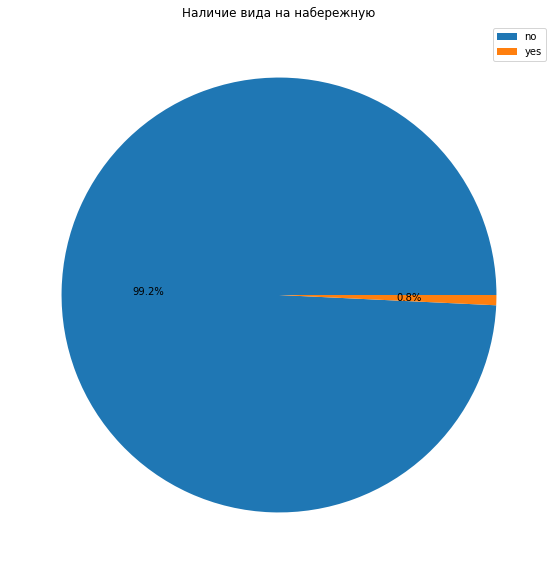

In [63]:
# Строим круговую диаграмму
plt.figure(figsize=(10, 10))
plt.pie(data, autopct='%1.1f%%')
plt.title('Наличие вида на набережную')
plt.legend(data.index);

### Из круговой диаграммы виден низкий процент (0,8 %) домов  с видом на набережную

In [67]:
# 2.2 Изучите распределение этажей домов
amount_floors = df['floors'].value_counts()
amount_floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

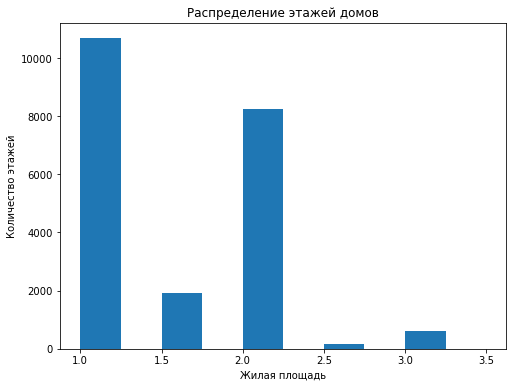

In [69]:
plt.figure(figsize=(8, 6))
plt.hist(df['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество этажей');

### Гистограмма показывает, что основная доля домов 1 и 2 этажа. 3.5 этажа- уникальные дома 

In [52]:
# 2.2 Изучите распределение состояния домов
data2_2 = df['condition'].value_counts().sort_index()
data2_2.head()

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

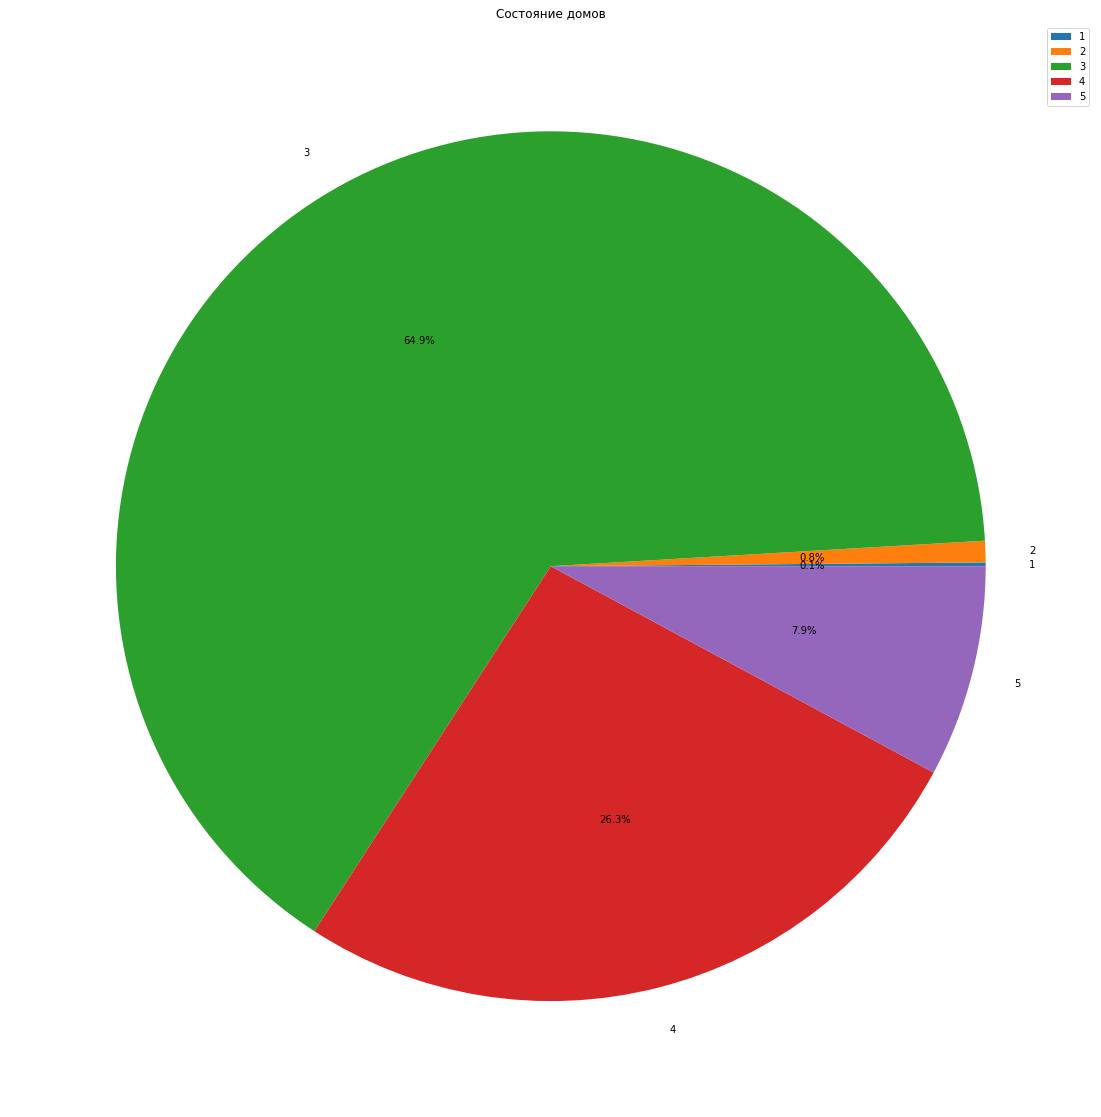

In [60]:
# Строим круговую диаграмму
plt.figure(figsize=(20,20))
names = data2_2.index
values = data2_2.values
plt.pie(values, labels=names, autopct='%1.1f%%')
plt.title('Состояние домов')
plt.legend(data.index+1);

### Из круговой диаграммы видно преимущество домов с оценкой 3 и 4, и что домов с низкой оценкой менее 1 %

## Задача 3  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,  
с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.  

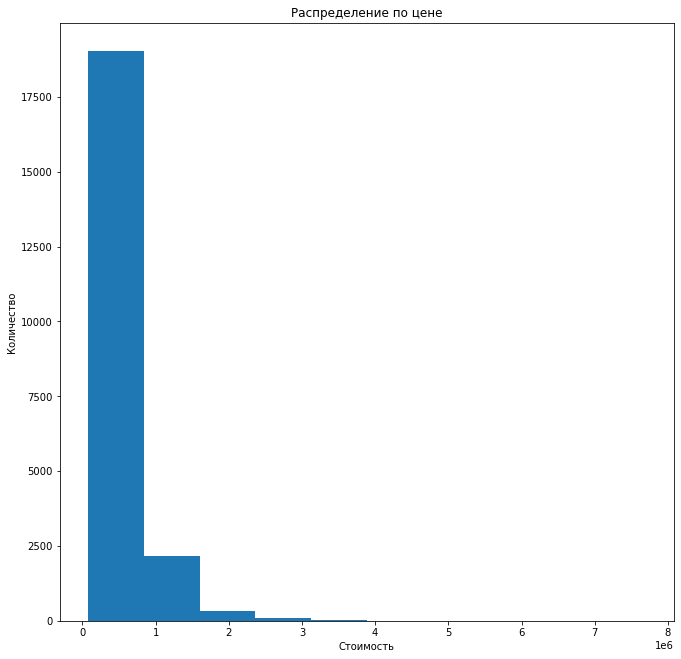

In [74]:
plt.figure(figsize=(11, 11))
plt.hist(df['price'])
plt.title('Распределение по цене')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

 ## Из гистограммы видно преимущество недорогих домов, и что очень мало домов с высокой стоимостью

In [72]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('price', axis=1, inplace=True)

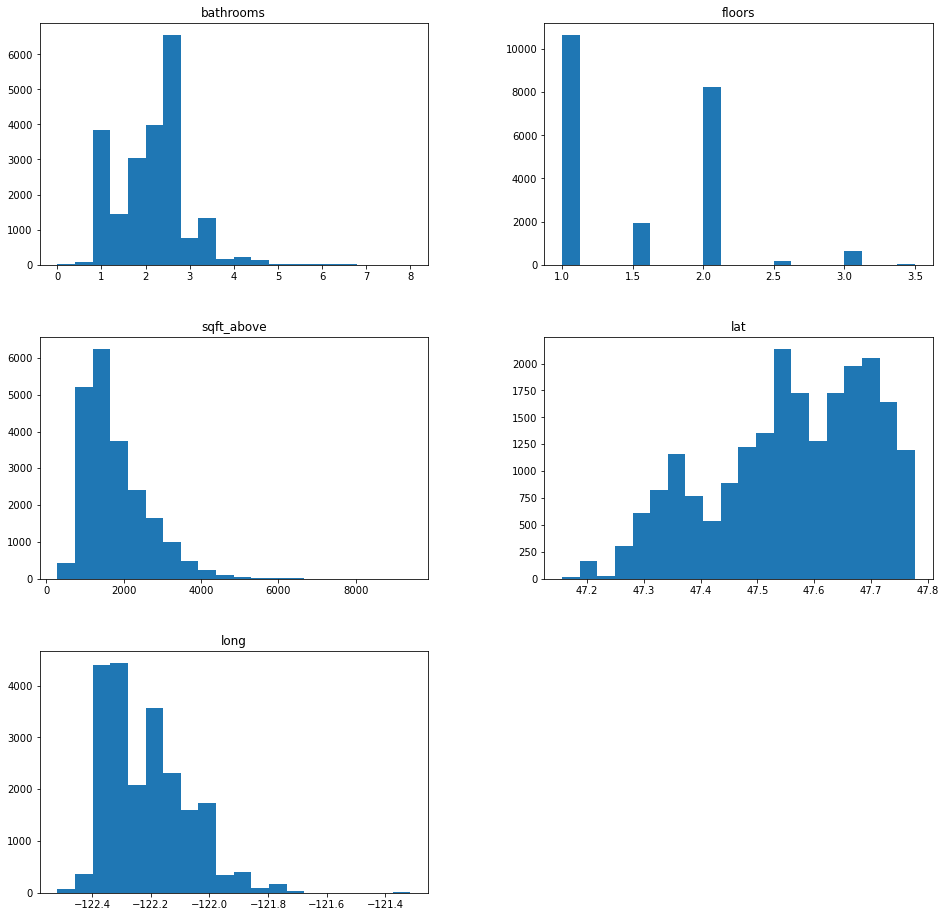

In [73]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

* bathrooms - заметно преимущество домов с двумя ванными комнатами  
* floors - заметно преимущество домов с 1 и 2 этажами  
* sqft above показывает дома с кв. метрами выше земли  
* lat long - широта и долгода, где высокие значения, предположительно, это центр города    

## Эти графики наглядно показывают как формируется цены на недвижимость, зависит от расположения, количества этажей, ванных комнат